# Cross-Tabulation

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data

In [2]:
data = data.frame(date=ymd(c("2017-12-30","2017-12-31","2018-01-01","2018-01-02","2018-01-03","2018-01-04","2018-01-05","2018-01-06","2018-01-07","2018-01-08","2018-01-09","2018-01-10","2018-01-11","2018-01-12")),
                  time_10am=c(7, 9, 1, 2, 1, 4, 4, 9,  8,  3, 1, 2, 2, 5),
                  time_2pm= c(9, 7, 4, 5, 2, 5, 6, 12, 12, 6, 2, 4, 6, 5),
                  time_6pm= c(5, 9, 3, 2, 3, 3, 4, 8,  10, 3, 2, 3, 5, 3),
                  time_10pm=c(9, 8, 3, 2, 1, 5, 4, 11, 11, 5, 1, 5, 5, 4))
data

date,time_10am,time_2pm,time_6pm,time_10pm
2017-12-30,7,9,5,9
2017-12-31,9,7,9,8
2018-01-01,1,4,3,3
2018-01-02,2,5,2,2
2018-01-03,1,2,3,1
2018-01-04,4,5,3,5
2018-01-05,4,6,4,4
2018-01-06,9,12,8,11
2018-01-07,8,12,10,11
2018-01-08,3,6,3,5


## Exercise 1

Add a calculated variable to the dataset for day of the week.  Position it as the 2nd column.

You may want to use these function(s):
* weekdays()

In [3]:
data$dow = weekdays(data$date)
data = data[, c(1, 6, 2:5)]
data

date,dow,time_10am,time_2pm,time_6pm,time_10pm
2017-12-30,Saturday,7,9,5,9
2017-12-31,Sunday,9,7,9,8
2018-01-01,Monday,1,4,3,3
2018-01-02,Tuesday,2,5,2,2
2018-01-03,Wednesday,1,2,3,1
2018-01-04,Thursday,4,5,3,5
2018-01-05,Friday,4,6,4,4
2018-01-06,Saturday,9,12,8,11
2018-01-07,Sunday,8,12,10,11
2018-01-08,Monday,3,6,3,5


## Exercise 2

Cross-tabulate the dataset.  Specify times for rows.  Specify days of the week for columns. Aggregate by mean. 

You may want to use these function(s):
* melt()
* dcast()
* factor()

Use `variable ~ factor(dow, day_names)` to ensure that column names are presented in a sensible order.

In [4]:
data.long = melt(data, id.vars=c("date", "dow"), measure.vars=c("time_10am","time_2pm","time_6pm", "time_10pm"))
data.cross = dcast(data.long, variable ~ factor(dow, DAY_NAMES), mean)
data.cross

variable,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
time_10am,8.5,2,1.5,1.5,3.0,4.5,8.0
time_2pm,9.5,5,3.5,3.0,5.5,5.5,10.5
time_6pm,9.5,3,2.0,3.0,4.0,3.5,6.5
time_10pm,9.5,4,1.5,3.0,5.0,4.0,10.0


## Exercise 3

Show a lineplot of mean value across day of week vs. time, for all days of week.  Distinguish days of week by color.  Do  not label horizontal axis.  Label vertical axis as `mean`.  Show a legend.   

You may want to use these function(s):
* ggplot()
* xlab()
* ylab()
* geom_line()
* scale_color_manual()

Use `scale_color_manual(values=PALETTE, breaks=day_names, labels=day_names)` to ensure that legend entries are presented in a sensible order.<br>
Use `geom_line(aes(........, group=1, .......))` because the lineplot x-axis labels are non-numeric. 

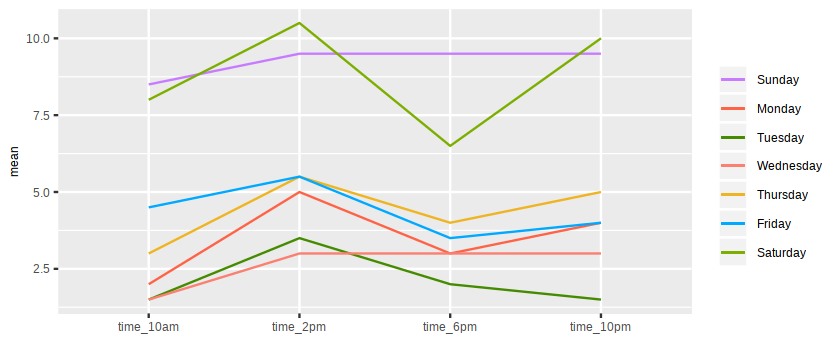

In [5]:
sunday.line = geom_line(aes(x=variable, group=1, y=Sunday, color="Sunday"))

monday.line = geom_line(aes(x=variable, group=1, y=Monday, color="Monday"))

tuesday.line = geom_line(aes(x=variable, group=1, y=Tuesday, color="Tuesday"))

wednesday.line = geom_line(aes(x=variable, group=1, y=Wednesday, color="Wednesday"))

thursday.line = geom_line(aes(x=variable, group=1, y=Thursday, color="Thursday"))

friday.line = geom_line(aes(x=variable, group=1, y=Friday, color="Friday"))

saturday.line = geom_line(aes(x=variable, group=1, y=Saturday, color="Saturday"))


ggplot(data.cross) + xlab("") + ylab("mean") + sunday.line + monday.line + tuesday.line + 
    wednesday.line + thursday.line + friday.line + saturday.line + 
    scale_color_manual(values=PALETTE, breaks=DAY_NAMES, labels=DAY_NAMES)

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised December 17, 2019
</span>
</p>
</font>